# The Stroop effect

**Independent variable** - the two conditions - congruent words, and incongruent words.

**Dependent variable** - reaction time in each of the two conditions.

**Hypotheses:**

Null hypotheses, $H_0$ - the reaction time of the congruent words condition is greater than or equal to the incongruent words condition: $\mu_{congruent} \ge \mu_{incongruent}$

Alternate hypotheses, $H_A$ - the reaction time of the congruent words condition is less than the incongruent words condition: $\mu_{congruent} < \mu_{incongruent}$

Where: $\mu_{congruent}$ - Mean of congruent reaction times in seconds, $\mu_{incongruent}$ - Mean of incongruent reaction times in seconds

**Recommended statistical test** - dependent samples t-test, one-tailed, negative.

**Justification for the hypotheses and test selection** - to prove that the reaction time of the incongruent words conditions is significantly longer than the congruent words condition. This will be in alignment with previous experimental findings/ results - http://psychclassics.yorku.ca/Stroop/; https://en.wikipedia.org/wiki/Stroop_effect#Stroop_test

My stroop effect time (https://faculty.washington.edu/chudler/java/ready.html) - congruent = 13.287 secs, incongruent = 27.269 secs

## Reading in and previewing the data

In [1]:
import pandas as pd

stroop_data = pd.read_csv("stroopdata.csv")
stroop_data.head(5)

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
stroop_data.shape

(24, 2)

## Descriptive statistics

In [4]:
stroop_data.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


From above:

* Mean - 
   * Congruent = 14.05 secs
   * Incongruent = 22.02 secs
* Standard deviation - 
   * Congruent = 3.56 secs
   * Incongruent = 4.80 secs
* Median - 
   * Congruent = 14.36 secs
   * Incongruent = 21.02 secs

## Data visualizations

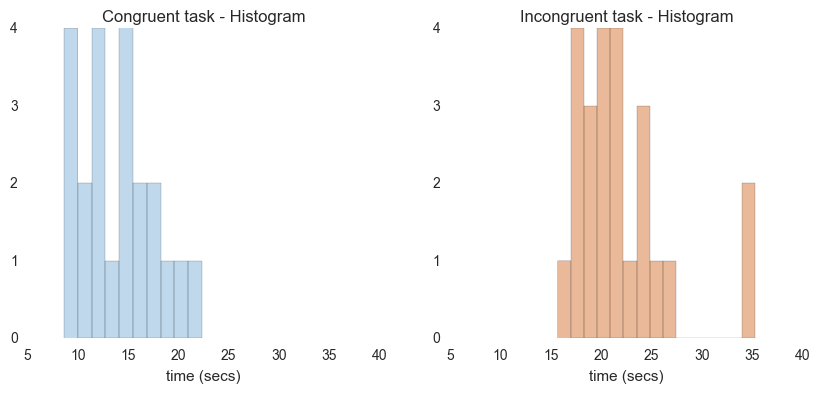

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("white")
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlim(5,40)
ax1.set_ylim(0,4)
sns.distplot(stroop_data["Congruent"], bins=10, kde=False, color=(95/255,158/255,209/255))
ax2 = fig.add_subplot(1,2,2)
ax2.set_xlim(5,40)
ax2.set_ylim(0,4)
sns.distplot(stroop_data["Incongruent"], bins=15, kde=False, color=(200/255, 82/255, 0/255))
sns.despine(left=True, bottom=True)
ax1.set_title("Congruent task - Histogram")
ax1.set_xlabel("time (secs)")
ax1.set_yticks([0,1,2,3,4])
ax2.set_title("Incongruent task - Histogram")
ax2.set_xlabel("time (secs)")
ax2.set_yticks([0,1,2,3,4])
plt.show()

/Users/jeganram/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


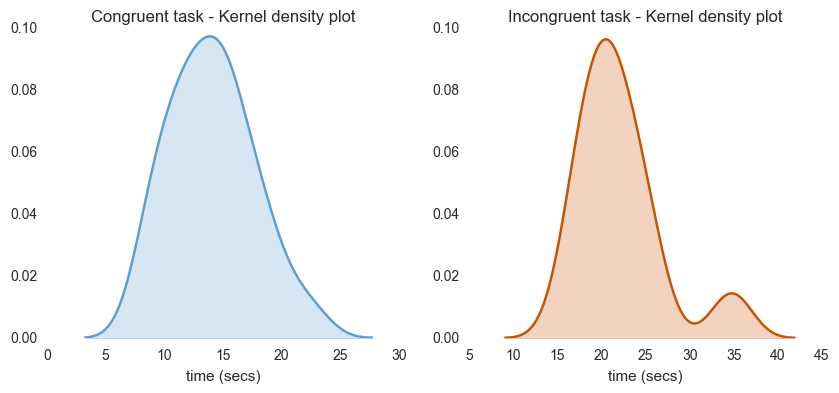

In [58]:
sns.set_style("white")
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
sns.kdeplot(stroop_data["Congruent"], shade=True, legend=False, color=(95/255,158/255,209/255))
ax2 = fig.add_subplot(1,2,2)
sns.kdeplot(stroop_data["Incongruent"], shade=True, legend=False, color=(200/255, 82/255, 0/255))
sns.despine(left=True, bottom=True)
ax1.set_title("Congruent task - Kernel density plot")
ax1.set_xlabel("time (secs)")
ax2.set_title("Incongruent task - Kernel density plot")
ax2.set_xlabel("time (secs)")
plt.show()

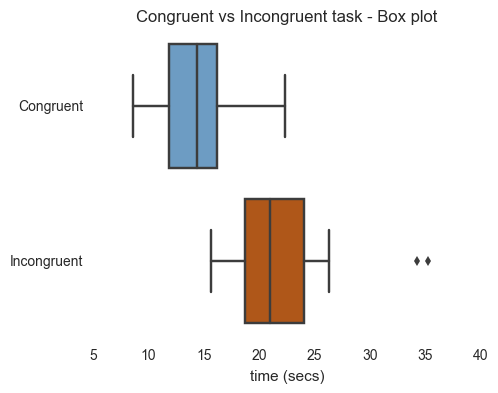

In [57]:
sns.set_style("white")
fig, ax = plt.subplots(figsize=(5,4))
sns.boxplot(data=stroop_data, orient="h", palette=[(95/255,158/255,209/255),(200/255, 82/255, 0/255)])
sns.despine(left=True, bottom=True)
ax.set_title("Congruent vs Incongruent task - Box plot")
ax.set_xlabel("time (secs)")
plt.show()

**Observations:**

1. Distribution of congruent and incongruent times are dense around the median and less spread out.
2. It is easily noticeable that the incongruent times are considerably higher than congruent times.

# Dependent samples t-test

$\bar x_c = 14.05$ secs

$\bar x_i = 22.02$ secs

$n = 24$

$df = 23$

In [73]:
stroop_data["Congruent - Incongruent"] = stroop_data["Congruent"] - stroop_data["Incongruent"]
stroop_data["Congruent - Incongruent"].std()

4.864826910359056

$s_{c-i} = 4.86$ secs

In [87]:
import math
from scipy import stats

mean_diff = stroop_data["Congruent"].mean()-stroop_data["Incongruent"].mean()
std_err = stroop_data["Congruent - Incongruent"].std()/math.sqrt(stroop_data["Congruent"].count())
print(mean_diff, std_err, stats.ttest_rel(stroop_data["Congruent"], stroop_data["Incongruent"]))

-7.964791666666665 0.9930286347783406 Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)


$\bar x_c - \bar x_i = -7.96$ secs

S.E. = 0.99 secs

$t_{stat} = -8.021$

P-value = 0.00000004

t(23) = -8.021, p=.00, one-tailed

$\alpha = 0.01$ i.e. confidence level = 99%

$t_{critical} = -2.500$

**Decision: Reject $H_0$ i.e. Reject - "the reaction time of the congruent words condition is greater than or equal to the incongruent words condition"**

**This means, that the reaction time of the congruent words condition is significantly less than the incongruent words condition. This outcome was expected based on previous experimental results.**

In [89]:
margin_err = 2.807*std_err
print("Confidence interval on the mean difference; 99% CI = (", round(mean_diff-margin_err,2),",",round(mean_diff+margin_err,2),")")

Confidence interval on the mean difference; 99% CI = ( -10.75 , -5.18 )


In [116]:
print("d =", round(mean_diff/stroop_data["Congruent - Incongruent"].std(),2))

d = -1.64


In [115]:
print("r^2", "=", round(t_stat**2/(t_stat**2+(stroop_data["Congruent"].count()-1)),2), end="")

r^2 = 0.74

## Cause of this effect and alternate task

The longer reaction time for the incongruent task is due to the automation of reading, where the mind automatically determines the semantic meaning of the word (it reads the word "red" and thinks of the color "red"), and then must intentionally check itself and identify instead the color of the word (the ink is a color other than red), a process that is not automated.

An alternative task could be the warped words Stroop effect. Much like the Stroop task, the printed word's color is different from the ink color of the word; however, the words are printed in such a way that it is more difficult to read (typically curved-shaped). The idea here is the way the words are printed slows down both the brain's reaction and processing time, making it harder to complete the task.

## References

http://psychclassics.yorku.ca/Stroop/

https://en.wikipedia.org/wiki/Stroop_effect#Stroop_test

https://www.dataquest.io/

http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf

https://wch.github.io/latexsheet/latexsheet.pdf

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html